In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
df = pd.read_csv('unsw-small.csv')
df_label = pd.DataFrame(df.label)

# Arrange Data into Features Matrix and Target Vector
#X = df.loc[:, df.columns != 'label']
#y = df.loc[:, 'label'].values

#df_train = pd.read_csv('AI_Cybersecurity_IDS_PoC/analysis/UNSW_NB15_training-set.csv')
#df_test = pd.read_csv('AI_Cybersecurity_IDS_PoC/analysis/UNSW_NB15_testing-set.csv')

In [49]:
df_label.describe()

,label
count,257673.000000
mean,0.639077
std,0.480269
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [50]:
del df['Unnamed: 0']
del df['rate']
#del df['id']

In [51]:
df

,dur,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes,attack_cat,label
0,0.121478,6,4,258,172,Normal,0
1,0.649902,14,38,734,42014,Normal,0
2,1.623129,8,16,364,13186,Normal,0
3,1.681642,12,12,628,770,Normal,0
4,0.449454,10,6,534,268,Normal,0
...,...,...,...,...,...,...,...
257668,0.000005,2,0,104,0,Normal,0
257669,1.106101,20,8,18062,354,Normal,0
257670,0.000000,1,0,46,0,Normal,0
257671,0.000000,1,0,46,0,Normal,0


In [52]:
df.attack_cat = df.attack_cat.apply(lambda x: 'Normal' if x == 'Normal' else 'Attack')

class2idx = {
    'Normal':0,
    'Attack':1,      
}

idx2class = {v: k for k, v in class2idx.items()}

df['attack_cat'].replace(class2idx, inplace=True)


# !!! WICHTIG ATACK_CAT IST GLEICH LABEL

In [53]:
df['attack_cat'].describe()

count    257673.000000
mean          0.639077
std           0.480269
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: attack_cat, dtype: float64

In [54]:
df['label'].describe()

count    257673.000000
mean          0.639077
std           0.480269
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: label, dtype: float64

In [55]:
df

,dur,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes,attack_cat,label
0,0.121478,6,4,258,172,0,0
1,0.649902,14,38,734,42014,0,0
2,1.623129,8,16,364,13186,0,0
3,1.681642,12,12,628,770,0,0
4,0.449454,10,6,534,268,0,0
...,...,...,...,...,...,...,...
257668,0.000005,2,0,104,0,0,0
257669,1.106101,20,8,18062,354,0,0
257670,0.000000,1,0,46,0,0,0
257671,0.000000,1,0,46,0,0,0


In [56]:
df = df.drop('label', axis = 1)
#category_col = ['proto', 'service', 'state', 'is_ftp_login', 'is_sm_ips_ports']
#numerical_col = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst']
num_feature = df

X = num_feature.iloc[:, 0:-1]
y = num_feature.iloc[:, -1]

In [57]:
#del num_feature['Unnamed: 0']
#del num_feature['id']
num_feature

,dur,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes,attack_cat
0,0.121478,6,4,258,172,0
1,0.649902,14,38,734,42014,0
2,1.623129,8,16,364,13186,0
3,1.681642,12,12,628,770,0
4,0.449454,10,6,534,268,0
...,...,...,...,...,...,...
257668,0.000005,2,0,104,0,0
257669,1.106101,20,8,18062,354,0
257670,0.000000,1,0,46,0,0
257671,0.000000,1,0,46,0,0


In [58]:
#del X['Unnamed: 0']
#del X['id']
X

,dur,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes
0,0.121478,6,4,258,172
1,0.649902,14,38,734,42014
2,1.623129,8,16,364,13186
3,1.681642,12,12,628,770
4,0.449454,10,6,534,268
...,...,...,...,...,...
257668,0.000005,2,0,104,0
257669,1.106101,20,8,18062,354
257670,0.000000,1,0,46,0
257671,0.000000,1,0,46,0


In [59]:
y

0         0
1         0
2         0
3         0
4         0
         ..
257668    0
257669    0
257670    0
257671    0
257672    0
Name: attack_cat, Length: 257673, dtype: int64

In [78]:
#X_train = num_feature[num_feature.attack_cat==0].sample(10000)
X_train = num_feature.sample(100000)
y_train = X_train.iloc[:, -1]
X_train = X_train.drop('attack_cat', axis = 1)

##############
## Split into train+val and test
##############
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [79]:
X_train

,dur,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes
150801,0.000003,2,0,114,0
132501,0.000003,2,0,114,0
164575,0.000005,2,0,114,0
8383,0.024262,38,40,2438,19266
140410,0.000002,2,0,220,0
...,...,...,...,...,...
178028,0.400177,12,22,876,22808
31626,6.789980,446,858,25056,1094788
111523,0.000000,1,0,46,0
46966,1.394000,6,2,978,86


In [80]:
y_train

150801    1
132501    1
164575    1
8383      0
140410    1
         ..
178028    1
31626     0
111523    0
46966     0
228071    1
Name: attack_cat, Length: 206138, dtype: int64

In [81]:
X_val

,dur,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes
150801,0.000003,2,0,114,0
132501,0.000003,2,0,114,0
164575,0.000005,2,0,114,0
8383,0.024262,38,40,2438,19266
140410,0.000002,2,0,220,0
...,...,...,...,...,...
178028,0.400177,12,22,876,22808
31626,6.789980,446,858,25056,1094788
111523,0.000000,1,0,46,0
46966,1.394000,6,2,978,86


In [82]:
##############
## Min/Max Scaling
##############

scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_val = scaler.transform(X_val) # 
#X_test = scaler.transform(X_test)

#X_train, y_train = np.array(X_train), np.array(y_train)
#X_val, y_val = np.array(X_val), np.array(y_val)
#X_test, y_test = np.array(X_test), np.array(y_test)

In [83]:
X_train

,dur,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes
150801,0.000003,2,0,114,0
132501,0.000003,2,0,114,0
164575,0.000005,2,0,114,0
8383,0.024262,38,40,2438,19266
140410,0.000002,2,0,220,0
...,...,...,...,...,...
178028,0.400177,12,22,876,22808
31626,6.789980,446,858,25056,1094788
111523,0.000000,1,0,46,0
46966,1.394000,6,2,978,86


In [84]:
X_val

,dur,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes
150801,0.000003,2,0,114,0
132501,0.000003,2,0,114,0
164575,0.000005,2,0,114,0
8383,0.024262,38,40,2438,19266
140410,0.000002,2,0,220,0
...,...,...,...,...,...
178028,0.400177,12,22,876,22808
31626,6.789980,446,858,25056,1094788
111523,0.000000,1,0,46,0
46966,1.394000,6,2,978,86


In [85]:
X_train

,dur,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes
150801,0.000003,2,0,114,0
132501,0.000003,2,0,114,0
164575,0.000005,2,0,114,0
8383,0.024262,38,40,2438,19266
140410,0.000002,2,0,220,0
...,...,...,...,...,...
178028,0.400177,12,22,876,22808
31626,6.789980,446,858,25056,1094788
111523,0.000000,1,0,46,0
46966,1.394000,6,2,978,86


Text(0.5, 1.0, 'Class Distribution in Test Set')

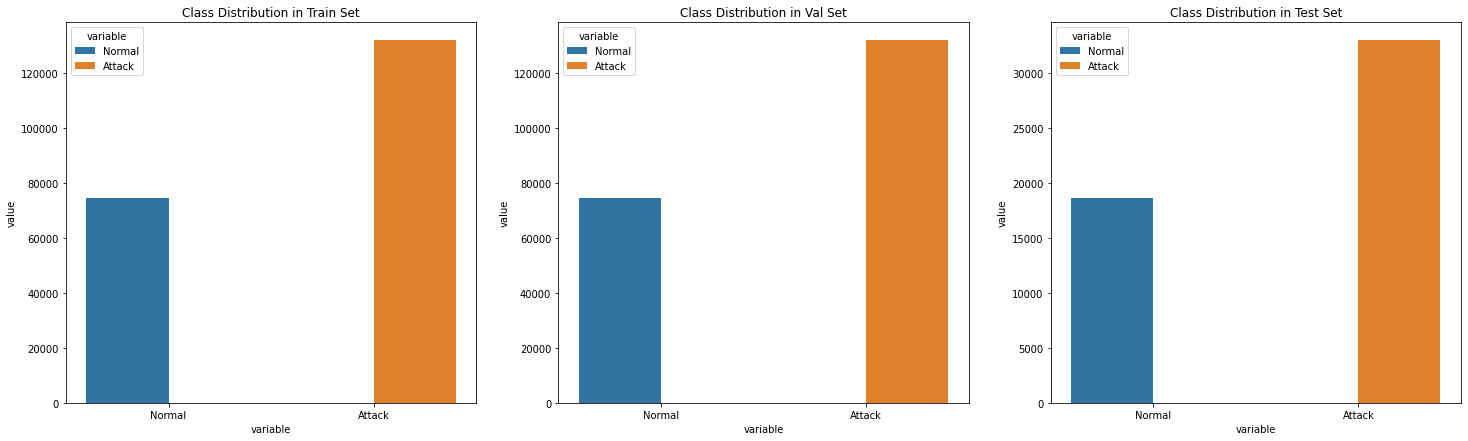

In [86]:
def get_class_distribution(obj):
    count_dict = {
        'Normal':0,
        'Attack':1,        
    }
    
    for i in obj:
        if i == 0: 
            count_dict['Normal'] += 1
        elif i == 1: 
            count_dict['Attack'] += 1        
        else:
            print("Check classes.")
            
    return count_dict

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,7))# Train
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_train)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('Class Distribution in Train Set')# Validation
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_val)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Class Distribution in Val Set')# Test
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_test)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[2]).set_title('Class Distribution in Test Set')

In [87]:
#float(X_train['rate'])

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve


In [89]:
X_train

,dur,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes
150801,0.000003,2,0,114,0
132501,0.000003,2,0,114,0
164575,0.000005,2,0,114,0
8383,0.024262,38,40,2438,19266
140410,0.000002,2,0,220,0
...,...,...,...,...,...
178028,0.400177,12,22,876,22808
31626,6.789980,446,858,25056,1094788
111523,0.000000,1,0,46,0
46966,1.394000,6,2,978,86


In [90]:
#del X_train['attack_cat']

In [91]:
rf = RandomForestClassifier(n_estimators=400,random_state=10,criterion='gini', max_leaf_nodes=15, max_depth=6)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, max_leaf_nodes=15, n_estimators=400,
                       random_state=10)

In [96]:
import joblib
joblib.dump(rf, "./random_forest.joblib")
loaded_rf = joblib.load("./random_forest.joblib")

In [97]:
X_train

,dur,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes
150801,0.000003,2,0,114,0
132501,0.000003,2,0,114,0
164575,0.000005,2,0,114,0
8383,0.024262,38,40,2438,19266
140410,0.000002,2,0,220,0
...,...,...,...,...,...
178028,0.400177,12,22,876,22808
31626,6.789980,446,858,25056,1094788
111523,0.000000,1,0,46,0
46966,1.394000,6,2,978,86


In [98]:
X_test

,dur,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes
147200,0.000009,2,0,114,0
22250,0.031928,72,74,4238,63516
11528,0.003120,6,8,320,1826
118913,1.158363,12,10,1466,808
87119,0.000003,2,0,168,0
...,...,...,...,...,...
9200,0.707798,108,114,9504,12298
140590,0.000005,2,0,180,0
242974,2.043880,14,14,756,768
109699,1.135932,10,8,1082,354


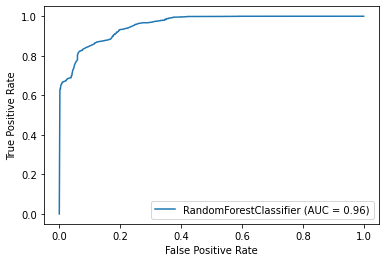

In [99]:
rf_disp = plot_roc_curve(rf, X_test, y_test)
plt.savefig('ROC_test_tiefer.png')


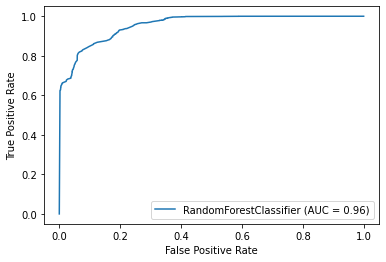

In [95]:
rf_disp = plot_roc_curve(rf, X_val, y_val)
plt.savefig('ROC_val_tiefer.png')
plt.show()

In [100]:
rf.predict(X)

array([0, 1, 1, ..., 0, 0, 1])

In [101]:
X

,dur,orig_pkts,resp_pkts,orig_ip_bytes,resp_ip_bytes
0,0.121478,6,4,258,172
1,0.649902,14,38,734,42014
2,1.623129,8,16,364,13186
3,1.681642,12,12,628,770
4,0.449454,10,6,534,268
...,...,...,...,...,...
257668,0.000005,2,0,104,0
257669,1.106101,20,8,18062,354
257670,0.000000,1,0,46,0
257671,0.000000,1,0,46,0


In [103]:
type(rf_disp)
#type(plt.savefig('ROC_val_tiefer.png'))
#plt.show()

sklearn.metrics._plot.roc_curve.RocCurveDisplay

In [106]:
type(rf_disp.figure_)

matplotlib.figure.Figure

In [120]:
nice = rf_disp.line_

#['xdata']
#ydata


In [134]:
xdata = nice.get_xdata()
ydata = nice.get_ydata()
xydata = nice.get_xydata()

In [128]:
new = ydata

In [139]:
dfroc = pd.DataFrame(xydata, columns=[['x','y']])


In [141]:
dfroc.to_csv('ROC-Curve-Coords2D.csv')

In [135]:
xdata

array([0.        , 0.00145161, 0.00177419, ..., 0.89451613, 0.99989247,
       1.        ])

In [136]:
ydata.tolist('')

array([0.        , 0.5246698 , 0.58147867, ..., 1.        , 1.        ,
       1.        ])

In [104]:
type(plt.savefig('ROC_val_tiefer.png'))

NoneType

<Figure size 432x288 with 0 Axes>